In [58]:
import pandas as pd
import altair as alt
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [59]:
tidy_df = pd.read_csv('tidy_df_30Min_20230101_20230110_planar_fit.csv')

In [60]:
def calculate_gradient_for_measurement(df, measurement='u'):
    # Group the DataFrame by "time" and "height"
    groups = df.query(f"measurement == '{measurement}'").groupby(["time", "tower"])

    # Define a function to fit a 2nd order polynomial to each group
    def fit_polynomial(group):
        x = [0] + list(group["height"].sort_values())
        y = [0] + list(group["value"].sort_values())
        coeffs = np.polyfit(x, y, 3)
        return pd.Series(coeffs, index=["a", "b", "c", "d"])
    def fit_polynomial_safely(group):
        try:
            return fit_polynomial(group)
        except SystemError:
            return pd.Series([np.nan, np.nan, np.nan(), np.nan], index=["a", "b", "c", "d"])

    # Apply the function to each group and store the results in a new DataFrame
    poly_coeffs_df = groups.apply(fit_polynomial_safely)
    return poly_coeffs_df

In [61]:
src_u = tidy_df.query("time == '2023-01-10 16:00:00'").query("tower == 'c'").query("measurement == 'wind speed'").sort_values("height")
src_v = tidy_df.query("time == '2023-01-10 16:00:00'").query("tower == 'c'").query("measurement == 'v'").sort_values("height")

In [62]:
tidy_df = pd.read_csv('tidy_df_30Min_20230101_20230110_planar_fit.csv')

In [63]:
def calculate_gradient_for_measurement(df, measurement='u'):
    # Group the DataFrame by "time" and "height"
    groups = df.query(f"measurement == '{measurement}'").groupby(["time", "tower"])

    # Define a function to fit a 2nd order polynomial to each group
    def fit_polynomial(group):
        x = [0] + list(group["height"].sort_values())
        y = [0] + list(group["value"].sort_values())
        coeffs = np.polyfit(x, y, 3)
        return pd.Series(coeffs, index=["a", "b", "c", "d"])
    def fit_polynomial_safely(group):
        try:
            return fit_polynomial(group)
        except SystemError:
            return pd.Series([np.nan, np.nan, np.nan(), np.nan], index=["a", "b", "c", "d"])

    # Apply the function to each group and store the results in a new DataFrame
    poly_coeffs_df = groups.apply(fit_polynomial_safely)
    return poly_coeffs_df

In [80]:
src_u = tidy_df.query("time == '2023-01-07 18:00:00'").query("tower == 'c'").query("measurement == 'u'").sort_values("height")
src_v = tidy_df.query("time == '2023-01-07 18:00:00'").query("tower == 'c'").query("measurement == 'v'").sort_values("height")

In [82]:
def log_linear_fn(z, a, b):
        z0 = 0.05 #(Sun et al., 2011)
        return a*np.log(z/z0) + b * (z/z0)
(a_u,b_u), _ = scipy.optimize.curve_fit(
    log_linear_fn,
    list(src_u.height),
    list(src_u.value),
)
(a_v,b_v), _ = scipy.optimize.curve_fit(
    log_linear_fn,
    list(src_v.height),
    list(src_v.value),
)

ValueError: array must not contain infs or NaNs

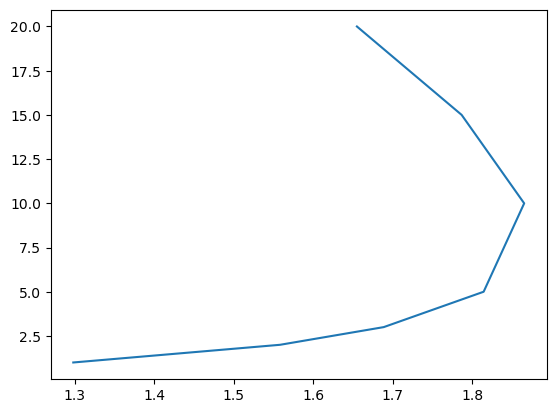

In [79]:
h_values = [1,2,3,5,10,15,20]

u_estimates = [log_linear_fn(h, a_u, b_u) for h in h_values]
v_estimates = [log_linear_fn(h, a_v, b_v) for h in h_values]
plt.scatter(src_u.value, src_u.height, color='k')
plt.plot(u_estimates, h_values)

In [ ]:
def get_estimates(row, height_values):
    a,b,c,d = (row['a'], row['b'], row['c'], row['d'])
    estimates = [
        a + b*h + c*h**2 + d*h**3 for h in height_values
    ]
    return estimates



example_set = poly_coeffs_df.query("time == '2023-01-10 16:00:00'").query("tower == 'c'")
estimates = get_estimates(example_set.iloc[0], [0,1,2,3,5,10,15,20])
estimates

plt.scatter(src.value, src.height)
plt.scatter(estimates, [0,1,2,3,5,10,15,20])
plt.xlim(0, 1)

In [ ]:
poly_coeffs_df.loc[poly_coeffs_df.index[0]]

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot()

In [ ]:
x, y

In [ ]:
poly_coeffs_df

In [ ]:
# create an empty list to hold the gradient values
gradient_values = []

groups = tidy_df.query("measurement == 'u'").groupby(["time", "tower"])


# loop through each group
for name, group in groups:
    # extract the values from the "height" and "value" columns
    x = group["height"].values
    y = group["value"].values

    # fit a second-order polynomial to the data
    coeffs = np.polyfit(y, x, 2)
    
#     deriv = np.polyder(coeffs)
#     # calculate the gradient of the fitted polynomial
#     gradient = 2 * coeffs[0] * x + coeffs[1]
    
#     # add the gradient values to the list
#     gradient_values.append(gradient)
    
# # convert the list of gradient values to a pandas DataFrame
# gradient_df = pd.DataFrame(gradient_values)

# # add columns for the "time" and "tower" values
# gradient_df["time"] = groups.apply(lambda x: x["time"].iloc[0]).values
# gradient_df["tower"] = groups.apply(lambda x: x["tower"].iloc[0]).values

# # rename the columns to something more descriptive
# gradient_df.columns = ["gradient", "time", "tower"]


In [ ]:
gradient_df

In [ ]:
# groupby: tower, height: time 

# Plot profiles of u, temperature, and humidity

# Fit 3 functions to 3 profiles

# Calculate shear at each height, interpolating with your fit
    # How to calculate shear?
    # 1. Differentiate the fitted function get value
    # 2. use the two sensors on either side?

# Assign calculated shear values to tidy_df

# calculate R^2 of fit

tidy_df

In [ ]:
g = tidy_df.groupby(['tower', 'height', 'time'])

In [ ]:
df = g.get_group(list(g.groups)[500])


In [ ]:
tidy_df.tower.unique()

In [ ]:
tidy_df.query("measurement == 'u'")

In [19]:
def log_linear_fn(z, a, b):
        z0 = 0.05 #(Sun et al., 2011)
        return a*np.log(z/z0) + b * (z/z0)
(a_u,b_u), _ = scipy.optimize.curve_fit(
    log_linear_fn,
    list(src_u.height),
    list(src_u.value),
)
(a_v,b_v), _ = scipy.optimize.curve_fit(
    log_linear_fn,
    list(src_v.height),
    list(src_v.value),
)

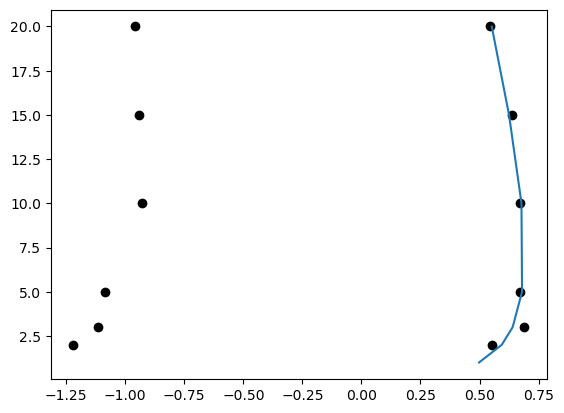

In [21]:
h_values = [1,2,3,5,10,15,20]

u_estimates = [log_linear_fn(h, a_u, b_u) for h in h_values]
v_estimates = [log_linear_fn(h, a_v, b_v) for h in h_values]
plt.scatter(src_u.value, src_u.height, color='k')
plt.plot(u_estimates, h_values)
plt.scatter(src_v.value, src_v.height, color='k')
# plt.plot(v_estimates, h_values)

In [ ]:
def get_estimates(row, height_values):
    a,b,c,d = (row['a'], row['b'], row['c'], row['d'])
    estimates = [
        a + b*h + c*h**2 + d*h**3 for h in height_values
    ]
    return estimates



example_set = poly_coeffs_df.query("time == '2023-01-10 16:00:00'").query("tower == 'c'")
estimates = get_estimates(example_set.iloc[0], [0,1,2,3,5,10,15,20])
estimates

plt.scatter(src.value, src.height)
plt.scatter(estimates, [0,1,2,3,5,10,15,20])
plt.xlim(0, 1)

In [ ]:
poly_coeffs_df.loc[poly_coeffs_df.index[0]]

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
plt.plot()

In [ ]:
x, y

In [ ]:
poly_coeffs_df

In [ ]:
# create an empty list to hold the gradient values
gradient_values = []

groups = tidy_df.query("measurement == 'u'").groupby(["time", "tower"])


# loop through each group
for name, group in groups:
    # extract the values from the "height" and "value" columns
    x = group["height"].values
    y = group["value"].values

    # fit a second-order polynomial to the data
    coeffs = np.polyfit(y, x, 2)
    
#     deriv = np.polyder(coeffs)
#     # calculate the gradient of the fitted polynomial
#     gradient = 2 * coeffs[0] * x + coeffs[1]
    
#     # add the gradient values to the list
#     gradient_values.append(gradient)
    
# # convert the list of gradient values to a pandas DataFrame
# gradient_df = pd.DataFrame(gradient_values)

# # add columns for the "time" and "tower" values
# gradient_df["time"] = groups.apply(lambda x: x["time"].iloc[0]).values
# gradient_df["tower"] = groups.apply(lambda x: x["tower"].iloc[0]).values

# # rename the columns to something more descriptive
# gradient_df.columns = ["gradient", "time", "tower"]


In [ ]:
gradient_df

In [ ]:
# groupby: tower, height: time 

# Plot profiles of u, temperature, and humidity

# Fit 3 functions to 3 profiles

# Calculate shear at each height, interpolating with your fit
    # How to calculate shear?
    # 1. Differentiate the fitted function get value
    # 2. use the two sensors on either side?

# Assign calculated shear values to tidy_df

# calculate R^2 of fit

tidy_df

In [ ]:
g = tidy_df.groupby(['tower', 'height', 'time'])

In [ ]:
df = g.get_group(list(g.groups)[500])


In [ ]:
tidy_df.tower.unique()

In [ ]:
tidy_df.query("measurement == 'u'")